### Social Buzz
#### An analysis of their content categories that highlights the top 5 categories with the largest aggregate popularity

##### Tasks

- Clean the data by:
removing rows that have values which are missing,
changing the data type of some values within a column, and
removing columns which are not relevant to this task.
Think about how each column might be relevant to the business question you’re investigating. If you can’t think of why a column may be useful, it may not be worth including it.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
reactions_df = pd.read_csv(r'Reactions.csv')
content_df = pd.read_csv(r'Content.csv')
reactionType_df = pd.read_csv(r'ReactionTypes.csv')

In [102]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [103]:
reactions_df.head(2)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50


In [104]:
reactions_df.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [105]:
reactions_new = reactions_df.dropna()

In [106]:
reactions_new = reactions_new.drop(columns=['Unnamed: 0', 'User ID', 'Datetime'])

In [107]:
reactions_new.isnull().sum()

Content ID    0
Type          0
dtype: int64

In [108]:
reactions_new.head(2)

,Content ID,Type
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike


In [109]:
content_df.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [110]:
content_df.head(2)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...


In [111]:
content_new = content_df.drop(columns=['Unnamed: 0','User ID','URL'])

In [112]:
content_new.isnull().sum()

Content ID    0
Type          0
Category      0
dtype: int64

In [113]:
content_new.head(2)

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating


In [123]:
reactionType_df.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [124]:
reactionType_new = reactionType_df.drop(columns=['Unnamed: 0'])

In [125]:
reactionType_new.head(2)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70


In [126]:
content_new.rename(columns={'Type':'ContentType'}, inplace=True)

In [118]:
content_new['ContentType'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [119]:
content_new['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [120]:
content_new['Category'] = content_new['Category'].str.replace('"','')

In [121]:
content_new['Category'] = content_new['Category'].str.lower()

In [137]:
content_new['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [122]:
reactions_new['Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'indifferent', 'super love', 'worried', 'like', 'heart',
       'want', 'intrigued', 'love', 'adore'], dtype=object)

In [79]:
reactionType_new['Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [128]:
# reactions_new.to_csv('cleaned_reactions.csv', index=False)
# reactionType_new.to_csv('cleaned_reactionTypes.csv', index=False)
# content_new.to_csv('cleaned_content.csv', index=False)

1. Create a final data set by merging your three tables together

We recommend using the Reaction table as your base table, then first join the relevant columns from your Content data set, and then the Reaction Types data set.

In [129]:
reactions_new.columns, content_new.columns, reactionType_new.columns

(Index(['Content ID', 'Type'], dtype='object'),
 Index(['Content ID', 'ContentType', 'Category'], dtype='object'),
 Index(['Type', 'Sentiment', 'Score'], dtype='object'))

In [130]:
rec_con = reactions_new.merge(content_new, how='left', on='Content ID')

rec_con.head()

,Content ID,Type,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,photo,studying


In [131]:
full_merged = rec_con.merge(reactionType_new, how='left', on='Type')

full_merged

,Content ID,Type,ContentType,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,photo,studying,positive,30
...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,audio,technology,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,audio,technology,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,audio,technology,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,audio,technology,negative,12


In [132]:
full_merged.rename(columns={'Type':'ReactionType'}, inplace=True)

In [133]:
full_merged.head()

,Content ID,ReactionType,ContentType,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,photo,studying,positive,30


In [89]:
# full_merged.to_csv('merged_reactions.csv',index=False)

2. Figure out the Top 5 performing categories

Add up the total scores for each category.
Hint: You can use the “Sum If” formula (in Excel)

The end result:

- A cleaned dataset
- The top 5 categories analysis
 
Generate the final data file.

In [134]:
top5_categories = full_merged.groupby(['Category'])['Score'].sum().sort_values(ascending=False).head(5).reset_index()

In [136]:
top5_categories

,Category,Score
0,animals,68624
1,science,65405
2,healthy eating,63138
3,technology,63035
4,food,61598


In [135]:
# with pd.ExcelWriter('reactions_analysis.xlsx') as writer:
#     full_merged.to_excel(writer, sheet_name='cleaned dataset', index=False)
#     top5_categories.to_excel(writer, sheet_name='top 5 categories', index=False)

#### Visualizations

In [140]:
import seaborn as sns

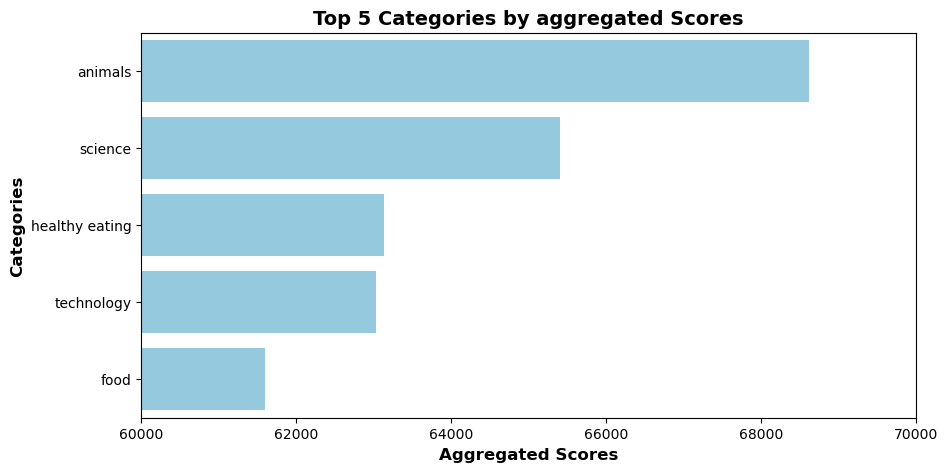

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(top5_categories, x='Score', y='Category', color='skyblue')
plt.title('Top 5 Categories by aggregated Scores', fontsize=14, weight='bold')
plt.xlabel('Aggregated Scores', fontsize=12, weight='bold')
plt.ylabel('Categories', fontsize=12, weight='bold')
plt.xlim(60000, 70000)
plt.savefig('aggregated_popularity')
plt.show()

In [158]:
full_merged.head()

,Content ID,ReactionType,ContentType,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,photo,studying,positive,30


In [168]:
full_merged['ContentType'].value_counts().sort_values(ascending=False)

ContentType
photo    6043
video    5728
GIF      5578
audio    5185
Name: count, dtype: int64

In [172]:
top5_categories['Category'].values

array(['animals', 'science', 'healthy eating', 'technology', 'food'],
      dtype=object)

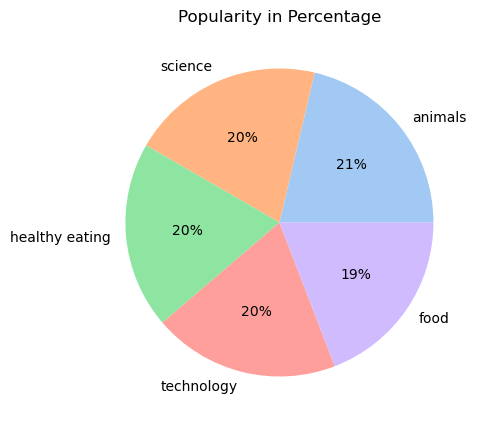

In [185]:
colors = sns.color_palette('pastel')[0:5]
data = top5_categories['Score'].values.tolist()
labels = top5_categories['Category'].values.tolist()

#create pie chart

plt.figure(figsize=(10,5))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Popularity in Percentage")
plt.savefig("percentage_popularity")
plt.show()